## Summary statistics 
### give a quick overview of the shape, center, and spread of a dataset. These values help you understand the data before applying machine learning models.

In [3]:
import seaborn as sns
data = sns.load_dataset('tips')

In [5]:
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## central Tendency

In [14]:
import numpy as np
mean = np.mean(data.total_bill)
median = np.median(data.tip)
mode = data.day.mode()[0]

In [15]:
print(mean, median, mode)

19.78594262295082 2.9 Sat


## Dispersion

In [17]:
np.std(data.tip)

np.float64(1.3807999538298954)

In [18]:
np.var(data['total_bill'])

np.float64(78.92813148851114)

## Distribution Analysis

#### Skewness
##### Shows the asymmetry of the data distribution:

##### Positive skew → Tail on the right (longer)

##### Negative skew → Tail on the left

#### Kurtosis
##### Describes the "tailedness" of the distribution:

##### High kurtosis → More outliers (heavy tails)

##### Low kurtosis → Fewer outliers (light tails)

In [19]:
from scipy.stats import skew
from scipy.stats import kurtosis

skewness = skew(data.tip)
kurt = kurtosis(data.tip)


In [20]:
skewness

np.float64(1.4564266884221506)

In [23]:
kurt

np.float64(3.5495519893455114)

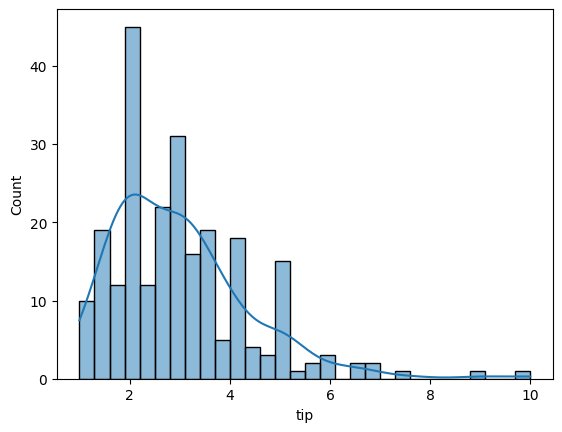

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data.tip, bins=30, kde=True)

📊 Interpretation of Skewness = 1.4564
This is a positive skew, meaning the distribution is right-skewed.

Most tip values are concentrated on the lower end, but a few high tips stretch the distribution to the right.

In short: many small tips, few large tips.

📌 Implication: Mean > Median — average tips are pulled up by those high values.

📊 Interpretation of Kurtosis = 3.5496
A kurtosis value > 3 indicates a leptokurtic distribution.

This means the tip distribution has heavier tails and a sharper peak than a normal distribution.

In other words: more frequent outliers — unusually high or low tips compared to normal.

🧠 Summary
The tip column is right-skewed with heavy tails. Most customers leave small tips, but there's a noticeable number of generous tippers who tip far above average.

In [32]:
data['log_tip'] = np.log1p(data['tip'])

<Axes: xlabel='log_tip', ylabel='Count'>

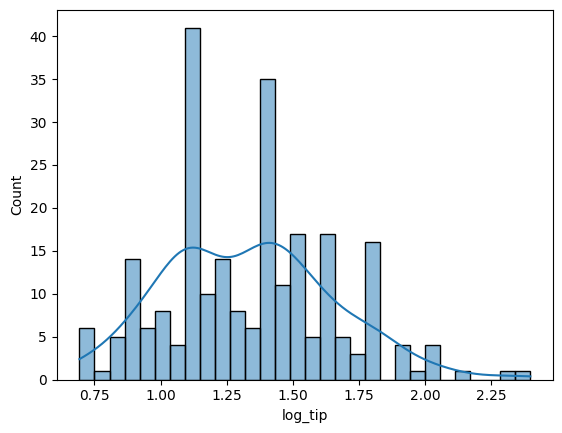

In [34]:
import seaborn as sns
sns.histplot(data.log_tip, bins=30, kde=True)

In [35]:
skew(data.log_tip)

np.float64(0.3781513352002364)

In [36]:
kurtosis(data.log_tip)

np.float64(-0.006838953387377611)

 Interpretation (After Transformation)
📈 Skewness ≈ 0.378
This is close to 0, indicating the distribution is nearly symmetric.

A slight positive skew remains, but it's within acceptable limits.

✅ Well-balanced — no strong asymmetry.

📊 Kurtosis ≈ -0.0068
This is very close to 0, which means the distribution is now mesokurtic (similar to a normal distribution).

✅ No heavy tails or sharp peak — ideal for many statistical models.